<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 2 - Pregunta 2 - Redes Convolucionales y sus aplicaciones </H3>
<H3 align='center'>  Jorge Portilla - John Rodriguez </H3>

<hr style="height:2px;border:none"/>

<a id="tercero"></a>
# Transfer Learning

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/05/31130754/transfer-learning.jpeg" , style="float: right;" />

> En esta sección se trabajará con el dataset trabajado anteriormente, CIFAR [3], pero en su versión más fina, en el cual se presentan 100 tipos distintos de categorías a clasificar la imagen (mutuamente excluyente), no 10 como se usó en las actividades anteriores. La estructura es la misma, son 60000 imágenes RGB de 32 $\times$ 32 píxeles separados en 50 mil de entrenamiento y 10 mil de pruebas.  

> Aquí se experimentará con el concepto de *transfer learning* el cual consta en transferir conocimiento de un dominio fuente (*source domain*) a un dominio objetivo (*target domain*). En redes neuronales existen muchas representaciones de esto, en común consta en pre inicializar los pesos de la red de alguna manera que no sea con distribuciones de manera aleatoria (*fine tunning*). También está lo que es utilizar una representación generada a través de otra red entrenada con muchos datos, esto es tomar la red y "*congelar*" sus primeras capas para tomar esta representación y no entrenar esos pesos, lo que realizaremos en esta sección. 

In [1]:
#Librerías y modulos
import numpy as np   
import os   
import keras
import pandas as pd
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


Definimos función para graficar los resultados.

In [0]:
def plotCurves(curves, labels, title, legends):
    plt.figure(1, figsize=(10, 6))
    for C in curves:
        plt.plot(range(1, len(C)+1), C)
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    plt.title(title)
    plt.grid(True)
    plt.legend(legends)
    plt.show()

Se cargan los datos por medio de este comando:

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 53s 0us/step


Se normalizan los datos entre [0,1] y se realiza la transforme de las etiquetas en one hot vectors para 100 clases.

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0


## Pregunta A

---


> Entrene una red neuronal convolucional como se presenta en el código a continuación durante 15 *epochs*, realizando un gráfico de evolución de la función de pérdida y de la exactitud del algoritmo (*accuracy*) sobre ambos conjuntos, entrenamiento y pruebas. Comente sobre el tiempo de ejecución de este entrenamiento. Reporte el *accuracy* del modelo final sobre el conjunto de pruebas.

Descipción del modelo:

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same',input_shape = x_train_norm.shape[1:],activation='relu'))
model.add(keras.layers.Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 100, kernel_initializer='glorot_uniform', activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

Se entrena el modelo con SGD:

In [0]:
opt = keras.optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test_norm,y_test))
result = pd.DataFrame(history.history)
result.to_csv("history_2a.csv")

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 16s 329us/step - loss: 4.3472 - acc: 0.0436 - val_loss: 3.8991 - val_acc: 0.1092
Epoch 2/15
50000/50000 [==============================] - 12s 237us/step - loss: 3.8160 - acc: 0.1176 - val_loss: 3.5552 - val_acc: 0.1690
Epoch 3/15
50000/50000 [==============================] - 12s 237us/step - loss: 3.5002 - acc: 0.1727 - val_loss: 3.2530 - val_acc: 0.2201
Epoch 4/15
50000/50000 [==============================] - 12s 237us/step - loss: 3.1744 - acc: 0.2325 - val_loss: 2.9483 - val_acc: 0.2782
Epoch 5/15
50000/50000 [==============================] - 12s 236us/step - loss: 2.8994 - acc: 0.2840 - val_loss: 2.7252 - val_acc: 0.3301
Epoch 6/15
50000/50000 [==============================] - 12s 236us/step - loss: 2.6662 - acc: 0.3276 - val_loss: 2.5968 - val_acc: 0.3542
Epoch 7/15
50000/50000 [==============================] - 12s 236us/step - loss: 2.4665 - acc: 0.3705 - val_loss: 2.

In [0]:
files.download('history_2a.csv') # from colab to browser download

Gráficos de la evolución de la pérdida y de la exactitud del algoritmo:

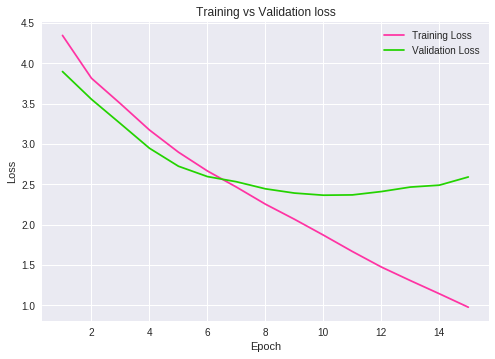

In [0]:
history_2a = pd.read_csv("history_2a.csv")
plt.plot(range(1, 16), history_2a['loss'], '#ff33a3', label = "Training Loss")
plt.plot(range(1, 16), history_2a['val_loss'], '#23D300', label = "Validation Loss")
plt.legend()
plt.title("Training vs Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

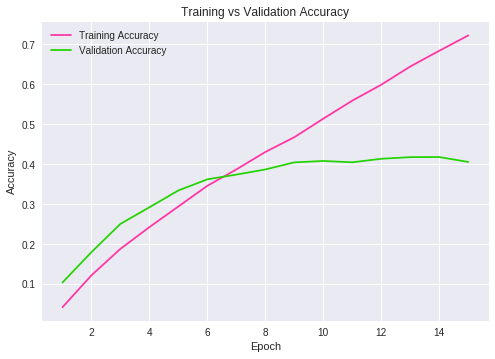

In [0]:
plt.plot(range(1, 16), history_2a['acc'], '#ff33a3', label = "Training Accuracy")
plt.plot(range(1, 16), history_2a['val_acc'], '#23D300', label = "Validation Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Se informa que la exactitud del algoritmo final es de **71.7%**,  los tiempos de ejecución son muy cortos es parte por la arquitectura usada que permite extraer muchas caracteristicas relevantes de la imagenes de entrenamiento. Computacionalmente se hace mas eficiente.

## Pregunta B

---


> Debido al comportamiento de las curvas de entrenamiento, claramente se ve que se necesita un regularizador. Experimente utilizando Dropout con una tasa de 0.25 en las tandas convolucionales, elija donde situarlo, luego de la primera convolución, después de la segunda, solamente después del *pooling*, en todas o alguna forma que le parezca conveniente, de argumentos de ello. La idea es que se forme una idea de dónde conviene colocar el regularizador y porqué.

El regularizador seria importante ubicarlo lo mas cercano posible a la entrada de las capas densas, asi se logra muestrear con mayor ruido, lo que hace que el modelo no tienda a sobreajustar, si no que por el contrario sea capaz de generalizar con nuevos datos. Pero para verificar vamos a entrenar con diferentes configuraciones y encontrar el mejor modelo.

In [0]:
conv_1 = keras.layers.Conv2D(32, (3, 3), padding='same',input_shape = x_train_norm.shape[1:],activation='relu')
conv_2 = keras.layers.Conv2D(32, (3, 3),padding='same',activation='relu')
pool_1 = keras.layers.MaxPooling2D(pool_size=(2, 2))
conv_3 = keras.layers.Conv2D(64, (3, 3),padding='same',activation='relu')
conv_4 = keras.layers.Conv2D(64, (3, 3),padding='same',activation='relu')
pool_2 = keras.layers.MaxPooling2D(pool_size=(2, 2))
drop = keras.layers.Dropout(0.25)
layers = np.array([conv_1, conv_2, pool_1, conv_3, conv_4, pool_2, drop])
drop_ways = np.array([[0, 6, 1, 2, 3, 4, 5],
                     [0, 1, 6, 2, 3, 4, 5],
                     [0, 1, 2, 6, 3, 4, 5],
                     [0, 1, 2, 3, 6, 4, 5],
                     [0, 1, 2, 3, 4, 6, 5],
                     [0, 1, 2, 3, 4, 5, 6],
                     [0, 6, 1, 2, 3, 6, 4, 5],
                     [0, 1, 6, 2, 3, 4, 6, 5],
                     [0, 1, 2, 6, 3, 4, 5, 6],
                     [0, 6, 1, 6, 2, 6, 3, 6, 4, 6, 5, 6]])

In [0]:
models_2b = np.empty((drop_ways.size, ), dtype=object)
for i in range(drop_ways.size):
    models_2b[i] = keras.models.Sequential()
    for layer in drop_ways[i]:
        models_2b[i].add(layers[layer])
    models_2b[i].add(keras.layers.Flatten())
    models_2b[i].add(keras.layers.Dense(1024,activation='relu'))
    models_2b[i].add(keras.layers.Dropout(0.5))
    models_2b[i].add(keras.layers.Dense(units = 100, kernel_initializer='glorot_uniform', activation = "softmax"))
    opt = keras.optimizers.SGD(lr=0.01,momentum=0.9)
    models_2b[i].compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
histories_2b = dict()
for i in range(drop_ways.size):
    print("\n MODELO NÚMERO "+str(i)+" :D\n")
    histories_2b[i] = pd.DataFrame(models_2b[i].fit(x_train_norm, y_train, batch_size = 128, epochs=15, verbose=1, validation_data=(x_test_norm,y_test)).history)


 MODELO NÚMERO 0 :D

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 14s 276us/step - loss: 4.1385 - acc: 0.0704 - val_loss: 3.8276 - val_acc: 0.1248
Epoch 2/15
50000/50000 [==============================] - 14s 274us/step - loss: 3.7126 - acc: 0.1338 - val_loss: 3.5080 - val_acc: 0.1776
Epoch 3/15
50000/50000 [==============================] - 14s 277us/step - loss: 3.4129 - acc: 0.1891 - val_loss: 3.3084 - val_acc: 0.2319
Epoch 4/15
50000/50000 [==============================] - 14s 274us/step - loss: 3.1388 - acc: 0.2377 - val_loss: 3.0423 - val_acc: 0.2655
Epoch 5/15
50000/50000 [==============================] - 14s 275us/step - loss: 2.8924 - acc: 0.2884 - val_loss: 2.8150 - val_acc: 0.3080
Epoch 6/15
50000/50000 [==============================] - 14s 275us/step - loss: 2.6863 - acc: 0.3275 - val_loss: 2.6879 - val_acc: 0.3375
Epoch 7/15
50000/50000 [==============================] - 14s 277us/step - loss: 2.4970 - acc:

In [0]:
result_2b = pd.concat(histories_2b)
result_2b.to_csv("histories_2b.csv")

In [0]:
files.download("histories_2b.csv")

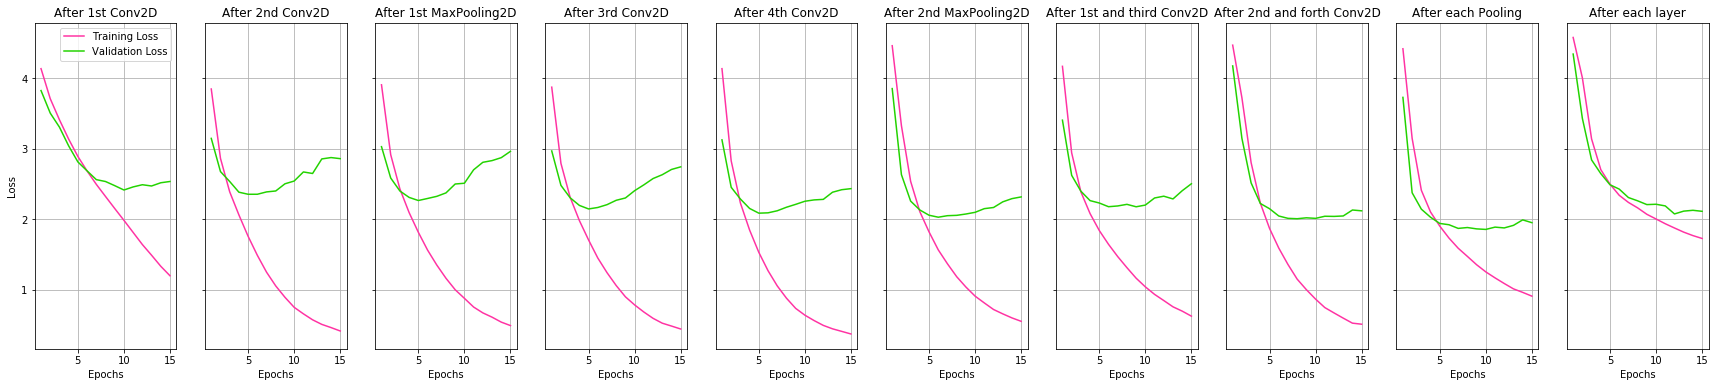

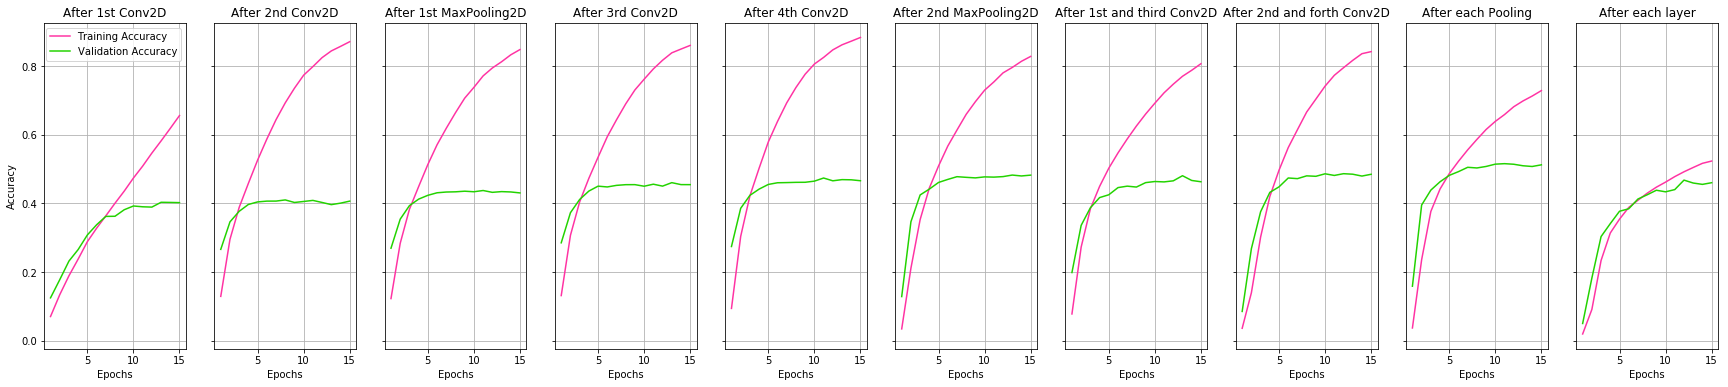

In [6]:
drop_ways = np.array([[0, 6, 1, 2, 3, 4, 5],
                     [0, 1, 6, 2, 3, 4, 5],
                     [0, 1, 2, 6, 3, 4, 5],
                     [0, 1, 2, 3, 6, 4, 5],
                     [0, 1, 2, 3, 4, 6, 5],
                     [0, 1, 2, 3, 4, 5, 6],
                     [0, 6, 1, 2, 3, 6, 4, 5],
                     [0, 1, 6, 2, 3, 4, 6, 5],
                     [0, 1, 2, 6, 3, 4, 5, 6],
                     [0, 6, 1, 6, 2, 6, 3, 6, 4, 6, 5, 6]])
histories = pd.read_csv("histories_2b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)
_, ax_loss = plt.subplots(1, 10, figsize = (30,6), sharey = True)
_, ax_acc = plt.subplots(1, 10, figsize = (30,6), sharey=True)

ax_loss[0].set_ylabel("Loss")
ax_acc[0].set_ylabel("Accuracy")

labels = ["After 1st Conv2D",
          "After 2nd Conv2D",
          "After 1st MaxPooling2D",
          "After 3rd Conv2D",
          "After 4th Conv2D",
          "After 2nd MaxPooling2D",
          "After 1st and third Conv2D",
          "After 2nd and forth Conv2D",
          "After each Pooling",
          "After each layer"]

for i in range(drop_ways.size):
    ax_loss[i].plot(range(1, 16), histories['loss'][i], '#ff33a3', label = "Training Loss")
    ax_loss[i].plot(range(1, 16), histories['val_loss'][i], '#23D300', label = "Validation Loss")
    ax_loss[i].grid(True)
    ax_loss[i].set_title(labels[i])
    ax_loss[i].set_xlabel("Epochs")
    
for i in range(drop_ways.size):
    ax_acc[i].plot(range(1, 16), histories['acc'][i], '#ff33a3', label = "Training Accuracy")
    ax_acc[i].plot(range(1, 16), histories['val_acc'][i], '#23D300', label = "Validation Accuracy")
    ax_acc[i].grid(True)
    ax_acc[i].set_title(labels[i])
    ax_acc[i].set_xlabel("Epochs")

ax_loss[0].legend()
ax_acc[0].legend()
plt.show()

Reporte de exactitud y pérdida de los módelos entrenados.

In [0]:
print("Max accuracy of the model with Dropout...")
for i in range(drop_ways.size):
    print("    "+labels[i]+": "+str(np.max(histories['val_acc'][i])))
    
print("\nMin loss of the model with Dropout...")
for i in range(drop_ways.size):
    print("    "+labels[i]+": "+str(np.min(histories['val_loss'][i])))

Max accuracy of the model with Dropout...
    After 1st Conv2D: 0.4031
    After 2nd Conv2D: 0.41
    After 1st MaxPooling2D: 0.4374
    After 3rd Conv2D: 0.4603
    After 4th Conv2D: 0.4738
    After 2nd MaxPooling2D: 0.4824
    After 1st and third Conv2D: 0.4805
    After 2nd and forth Conv2D: 0.4864
    After each Pooling: 0.5156
    After each layer: 0.4677

Min loss of the model with Dropout...
    After 1st Conv2D: 2.416122531890869
    After 2nd Conv2D: 2.3557246421813964
    After 1st MaxPooling2D: 2.267000689697265
    After 3rd Conv2D: 2.147314729690552
    After 4th Conv2D: 2.0874760879516603
    After 2nd MaxPooling2D: 2.0301742649078367
    After 1st and third Conv2D: 2.178161109924317
    After 2nd and forth Conv2D: 2.008563090515137
    After each Pooling: 1.8567655252456663
    After each layer: 2.076386618423462


Dés pues de cada capa de pooling se obtuvieron los mejores resultados, tiene sentido ya que la útltima capa de pooling esta cerca de la entrada a las capas densas. Se reporta el mejor accuracy de **51.56% para este modelo **. Colocar un dropout luego de una capa convolucional es lo mismo que apagar un filtro, por lo que podría terminar con mejor comportamiento, haciendo que se pierda demasiada información: estaríamos dandole mucha responsabilidad a ciertos filtros. Por esta razon y por lo observado, colocar el Dropout luego del pooling es la mejor opción.

Se puede concluir que es mejor añadir dropout despues de las capas de polling

## Pregunta C

---

> Una forma de hacer lo que se conoce como transfer learning es utilizar el conocimiento (los parámetros) aprendido por una red entrenada con millones de imágenes, y tomar estos parámetros como los pre entrenados. Para esto se utilizará el modelo VGG16 [7] proporcionado a través de la interfaz de keras. Visualice el modelo y sus 23 capas. Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.
Recuerde normalizar los datos de la manera en que fue entrenado VGG ¿Cuál es éste proceso?


Se obtienen los pesos preentrenados

In [0]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.engine.input_layer import Input

Se visualiza el modelo y sus capas. Además se muestra el código con los métodos de python para realizar el preprocesamiento de la data, tal cual se realizo en el modelo VGG16.

In [0]:
x_train_vgg = preprocess_input(x_train)
x_test_vgg = preprocess_input(x_test)
input_tensor= Input(shape = x_train_vgg.shape[1:])
modelVGG = VGG16(weights = 'imagenet', include_top = False, input_tensor =  input_tensor) # LOAD PRETRAINED MODEL 
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
modelVGG.summary()

58892288/58889256 [==============================] - 6s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool

Para VGG16 se descubrieron ciertas caracterisitcas y algunas nos sirven para el dataset de  CIFAR100. Al hacer transfer learning con VGG16 queda un modelo mas grande: desventaja o ventaja los filtros que sobran y no sirven?, podría conducir a sobreajustar el modelo.
Ademá el modelo VGG16 tiene los canales en un orden diferente, sus componentes son BGR y no en el orden RGB.

## Pregunta D


---

> Entrene esta red agregando una capa densa de 1024 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 100 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 10 epochs y grafique las curvas de entrenamiento con respecto al modelo definido en a) o con regularización definido en b) ¿Qué sucede? Comente.

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = features_train.shape[1:]))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, kernel_initializer = 'glorot_uniform', activation = "softmax"))

opt = keras.optimizers.SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_2d = pd.DataFrame(model.fit(features_train, y_train, epochs = 10, batch_size=128, verbose=1,validation_data=(features_test,y_test)).history)
history_2d.to_csv("history_2d.csv")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 45us/step - loss: 14.5206 - acc: 0.0907 - val_loss: 14.3479 - val_acc: 0.1059
Epoch 2/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.4267 - acc: 0.1026 - val_loss: 14.3942 - val_acc: 0.1048
Epoch 3/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.4141 - acc: 0.1038 - val_loss: 14.2919 - val_acc: 0.1116
Epoch 4/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.3138 - acc: 0.1107 - val_loss: 14.3171 - val_acc: 0.1106
Epoch 5/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.4835 - acc: 0.1004 - val_loss: 14.5160 - val_acc: 0.0984
Epoch 6/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.5201 - acc: 0.0984 - val_loss: 14.4304 - val_acc: 0.1040
Epoch 7/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.5841 - acc: 0.0945 - val_loss: 14.

Se grafican los resultados obtenidos, y son comparados con el punto a) y b)

In [0]:
files.download("history_2d.csv")

Accuracy vs Epochs


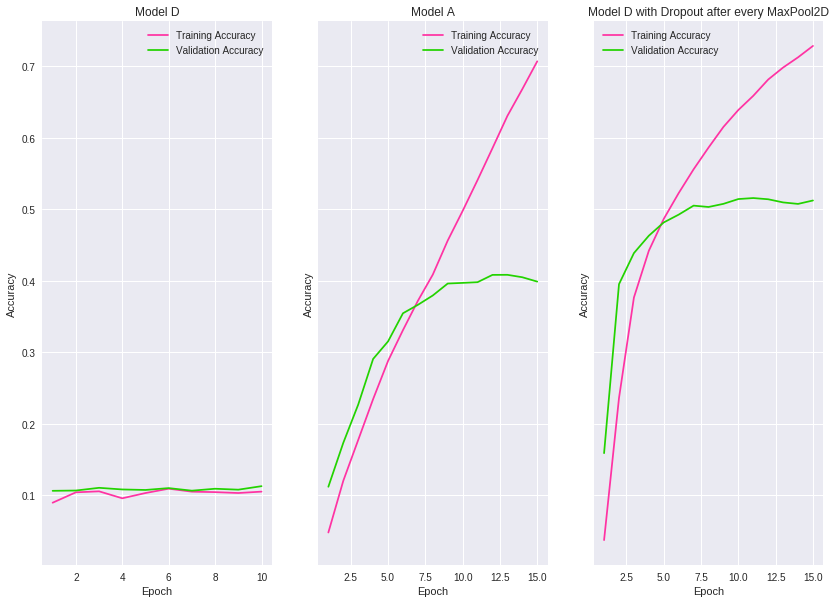

In [0]:
history_2d = pd.read_csv("history_2d.csv")
history_2a = pd.read_csv("history_2a.csv")
histories_2b = pd.read_csv("histories_2b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

_, ax = plt.subplots(1, 3, sharey = True, figsize=(14,10))

print("Accuracy vs Epochs")

ax[0].plot(range(1, 11), history_2d['acc'], '#ff33a3', label = "Training Accuracy")
ax[0].plot(range(1, 11), history_2d['val_acc'], '#23D300', label = "Validation Accuracy")
ax[0].legend()
ax[0].set_title("Model D")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")

ax[1].plot(range(1, 16), history_2a['acc'], '#ff33a3', label = "Training Accuracy")
ax[1].plot(range(1, 16), history_2a['val_acc'], '#23D300', label = "Validation Accuracy")
ax[1].legend()
ax[1].set_title("Model A")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")

ax[2].plot(range(1, 16), histories_2b['acc'][8], '#ff33a3', label = "Training Accuracy")
ax[2].plot(range(1, 16), histories_2b['val_acc'][8], '#23D300', label = "Validation Accuracy")
ax[2].legend()
ax[2].set_title("Model D with Dropout after every MaxPool2D")
ax[2].set_xlabel("Epoch")
ax[2].set_ylabel("Accuracy")

plt.show()

Manteniendo la misma configuracipon del optimizador en los tres casos se realiza una comparación sensata. Como se puede apreciar el accuracy obtenido en este punto es muy lejano a lo obtenido en a) y b),  esto porque los párametros aprendidos en el modelo VGG16 fueron para una representación especifica de una entrada y salida, al tomar estos pesos y tratar de entrenar no dará ningún buen resultado por que el  cambio de covarianza interno.  Por lo que añadir una normalización soluciona el problema, esto se realiza en el siguiente punto añadiendo una capa de batch normalization.


## Pregunta E
*Agregue* una capa de normalización (*Batch Normalization* [8]) de las activaciones en las capas densas, esto es, restar por la media del batch y dividir por la desviación estándar. Vuelva a entrenar el modelo con la misma configuración pero ahora por **15 *epochs***. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en e)? Realice los mismos gráficos que en a) a través del número de *epochs* y comente sobre el tiempo de ejecución de este entrenamiento.

Se define el modelo añadiendo la capa con la normalización Batch Normalization:

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=features_train.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, kernel_initializer = 'glorot_uniform', activation = "softmax"))
opt = keras.optimizers.SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_2e = pd.DataFrame(model.fit(features_train, y_train, epochs = 15, batch_size=128, verbose=1,validation_data=(features_test,y_test)).history)
history_2e.to_csv("history_2e.csv")

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 76us/step - loss: 3.3058 - acc: 0.2690 - val_loss: 2.4391 - val_acc: 0.3918
Epoch 2/15
50000/50000 [==============================] - 3s 66us/step - loss: 2.4893 - acc: 0.3752 - val_loss: 2.3017 - val_acc: 0.4133
Epoch 3/15
50000/50000 [==============================] - 3s 66us/step - loss: 2.2536 - acc: 0.4119 - val_loss: 2.2555 - val_acc: 0.4215
Epoch 4/15
50000/50000 [==============================] - 3s 65us/step - loss: 2.1202 - acc: 0.4363 - val_loss: 2.2363 - val_acc: 0.4270
Epoch 5/15
50000/50000 [==============================] - 3s 66us/step - loss: 2.0214 - acc: 0.4550 - val_loss: 2.1880 - val_acc: 0.4451
Epoch 6/15
50000/50000 [==============================] - 3s 66us/step - loss: 1.9437 - acc: 0.4714 - val_loss: 2.1966 - val_acc: 0.4373
Epoch 7/15
50000/50000 [==============================] - 3s 66us/step - loss: 1.8600 - acc: 0.4899 - val_loss: 2.2032 - val_acc

In [0]:
files.download('history_2e.csv') # from colab to browser download

Añadir Batch Normalization permitio que el tiempo de entrenamiento se redujera notablemente comparado con los modelos anteriormente entrenados. 
Esto es debido a que la normalización acelera el aprendizaje reduciendo el cambio de covarianza interna, que es el  cambio en los valores de las unidades ocultas.  Esto permite utilizar learning rates mas altos por que Batch Norm hace que las activaciones no sean muy altas o muy bajas.

A continuación se muestran los gráficos de la evolución de la pérdida:

Loss vs Epochs


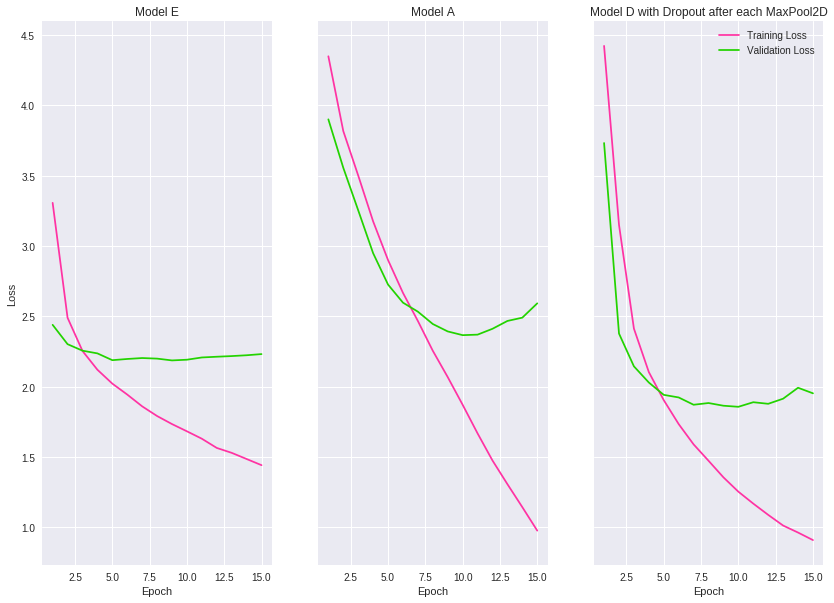

In [0]:
history_2a = pd.read_csv("history_2a.csv")
history_2e = pd.read_csv("history_2e.csv")
histories_2b = pd.read_csv("histories_2b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

_, ax = plt.subplots(1, 3, sharey = True, figsize=(14,10))

print("Loss vs Epochs")

ax[0].plot(range(1, 16), history_2e['loss'], '#ff33a3', label = "Training Loss")
ax[0].plot(range(1, 16), history_2e['val_loss'], '#23D300', label = "Validation Loss")
ax[0].set_title("Model E")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(range(1, 16), history_2a['loss'], '#ff33a3', label = "Training Loss")
ax[1].plot(range(1, 16), history_2a['val_loss'], '#23D300', label = "Validation Loss")
ax[1].set_title("Model A")
ax[1].set_xlabel("Epoch")

ax[2].plot(range(1, 16), histories_2b['loss'][8], '#ff33a3', label = "Training Loss")
ax[2].plot(range(1, 16), histories_2b['val_loss'][8], '#23D300', label = "Validation Loss")
ax[2].legend()
ax[2].set_title("Model D with Dropout after each MaxPool2D")
ax[2].set_xlabel("Epoch")

plt.show()

Accuracy vs Epochs


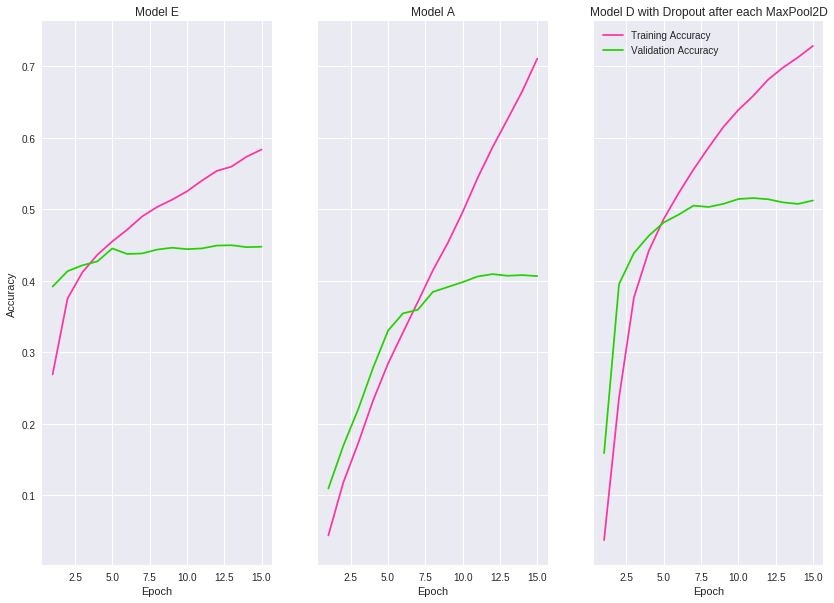

In [0]:
_, ax = plt.subplots(1, 3, sharey = True, figsize=(14,10))

print("Accuracy vs Epochs")

ax[0].plot(range(1, 16), history_2e['acc'], '#ff33a3', label = "Training Accuracy")
ax[0].plot(range(1, 16), history_2e['val_acc'], '#23D300', label = "Validation Accuracy")
ax[0].set_title("Model E")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")

ax[1].plot(range(1, 16), history_2a['acc'], '#ff33a3', label = "Training Accuracy")
ax[1].plot(range(1, 16), history_2a['val_acc'], '#23D300', label = "Validation Accuracy")
ax[1].set_title("Model A")
ax[1].set_xlabel("Epoch")

ax[2].plot(range(1, 16), histories_2b['acc'][8], '#ff33a3', label = "Training Accuracy")
ax[2].plot(range(1, 16), histories_2b['val_acc'][8], '#23D300', label = "Validation Accuracy")
ax[2].legend()
ax[2].set_title("Model D with Dropout after each MaxPool2D")
ax[2].set_xlabel("Epoch")

plt.show()

Es interesante ver la diferencia de los resultados entre los punto d) y e). Un  algoritmo aprendio algo del mapeo de X a Y, al existir un cambio en la distribución de X se deberia entrenar nuevamente el algoritmo para alinear la distribución de X con la de Y nuevamente. Pero es justamente aqui donde Batch Norm actua realizando una  adaptaciones a los parámetros de la red apra que el mapeo aprendido anteriormente funcione.

Batch se demora más por epoch pero converge más rápido.



## Pregunta G
¿Cuándo podría ser útil y cuando no utilizar *transfer learning* o una red pre-entrenada?

Transfer Learning es la reutilización de un modelo preentrenado en un nuevo problema, es muy popular en Deep Learning permitiendo entrenar redes neuronales con muy poca información. Esto es una gran ventaja ya que la mayoría de problemas de la vida real no cuentan con millones de datos para entrenar modelos complejos, por lo que usar transfer learning hace que la exactitud del algoritmo sea mejor en la mayoría de casos además de acelerar el entrenamiento.

En general el uso de esta técnica es recomendable cuando no se tienen suficientes datos para capacitación. También cuando existe una red entrenada para tareas similares.

Si se cuenta con suficientes datos sería recomendable realizar el entrenamiento desde cero. Es importante que la cantidad de datos de entrenamiento sea limitado ya que el tener modelos preentrenados con millones de parámetros y número reducido de datos etiquetados pueden conducir a sobre ajustar el algoritmo.
Otro problema asociado es que si se eliminan capas convolucionales de las primeras capas, se tiene problemas con las capas densas donde el número de parámetros cambia y no se tendrá un buen aprendizaje al cambiar las características de bajo nivel.






---

